# Лабораторная работа 5. Статистический анализ параметров и показателей надёжности


Вариант 12

Лазарев Эдуард Артемович
N33471

### Законы распределения, рассмотренные в работе

1. Экспоненциальный ЗР
    
    $f(x) = \lambda e^{-\lambda x}, 0 < x < \infty$
    
    $F(x) = 1 - e^{-\lambda x}, 0 < x < \infty$
    
2. Усечённый нормальный ЗР

    $f(x) = cf'(x)$, <br>
    где $c = \frac{1}{\int_0^\infty f(x) dx}$ - нормирующий множитель. <br>
    $f'(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-M)^2}{2\sigma^2}} $ - плотность неусечённого распределения.
    
    $F(x) = \frac{c}{\sigma \sqrt{2\pi}} \int_{0}^{x} e^{- \frac{(t-M)^2}{2\sigma^2}}dt, 0 < x < \infty$

3. ЗР Релея

    $f(x) = \frac{x}{\sigma^2} e^{- \frac{x^2}{2\sigma^2}}, 0 < x < \infty$
    
    $F(x) = 1 - e^{- \frac{x^2}{2\sigma^2}}, 0 < x < \infty$

[ 5  6  7  7 10 10 13 15 17 19 27 31 31 34 38 44 46 50 51 53 55 56 64 65
 65 67 68 70 76 77 84 86 87 89 91 92 93 95 97 99] 
min: 0 max: 100 sum: 2090 size: 40
Правило разбиения интервала №1
Экспоненциальный ЗР
№	mi	pi	Npi	x
1	0	0.24	9.57	9.39
2	7	0.18	7.28	7.01
3	4	0.14	5.54	5.34
4	4	0.11	4.21	3.94
5	7	0.08	3.21	2.89
6	6	0.06	2.44	2.22
7	3	0.05	1.86	1.57
Σ				32.36

Усеченный нормальный ЗР
№	mi	pi	Npi	x
1	0	0.0	0.0	314783137490.77
2	7	0.0	0.0	1280.62
3	4	0.02	0.73	0.54
4	4	0.76	30.4	30.12
5	7	0.22	8.87	8.55
6	6	0.0	0.01	1.97
7	3	0.0	0.0	60227875.32
Σ				314843366687.88

ЗР Релея
№	mi	pi	Npi	x
1	0	0.06	2.28	2.11
2	7	0.15	6.09	5.82
3	4	0.2	8.04	7.84
4	4	0.2	7.95	7.67
5	7	0.16	6.42	6.1
6	6	0.11	4.39	4.16
7	3	0.06	2.58	2.29
Σ				36.0

Правило разбиения интервала №2
Экспоненциальный ЗР
№	mi	pi	Npi	x
1	0	0.19	7.66	7.51
2	6	0.15	6.19	5.95
3	4	0.13	5.01	4.83
4	3	0.1	4.05	3.9
5	3	0.08	3.27	3.08
6	5	0.07	2.65	2.43
7	4	0.05	2.14	1.92
8	5	0.04	1.73	1.54
9	3	0.03	1.4	1.16
Σ				32.31

Усеченный норм

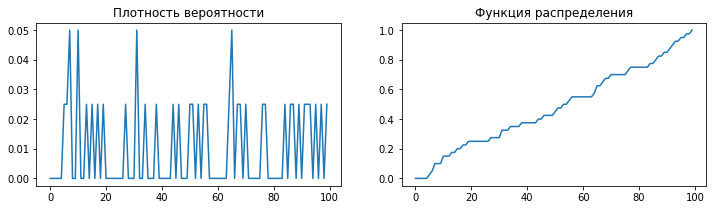

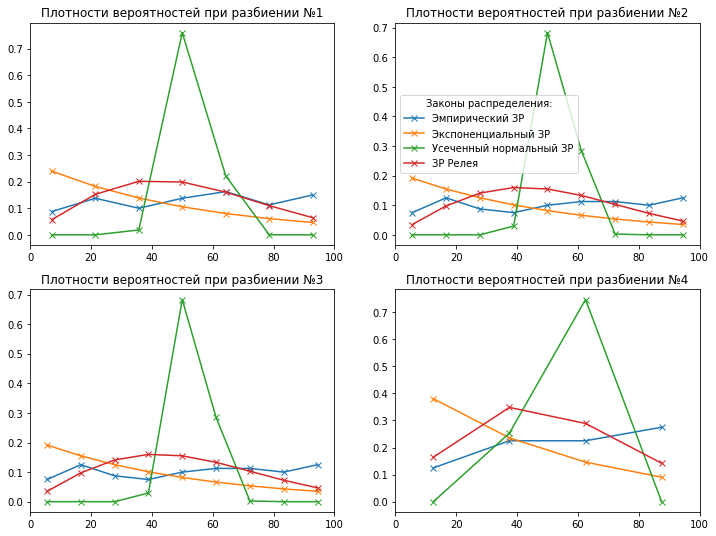

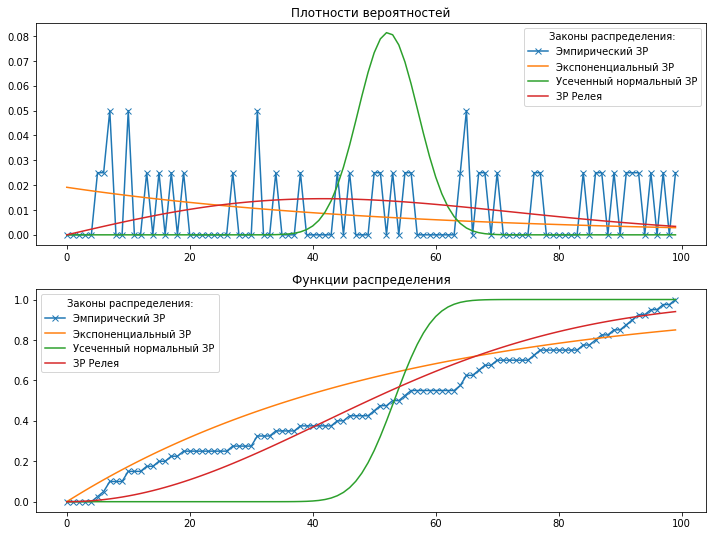

In [1]:
from math import sqrt, exp, ceil, pow, log, log10
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# теоретические плотности вероятности и ФР для трех ЗР

# функция распределения экспоненциального ЗР
def expF(lambada, x):
  return 1 - exp(-lambada * x)

# плотность вероятности экспоненциального ЗР
def expf(lambada, x):
  return lambada * exp(-lambada * x)

# функция распределения усеченного нормального ЗР
def normtF(params, x):
  if x == 0:
    return 0
  y = [normtf(params, xi) for xi in range(round(x))]
  return simps(y, np.arange(round(x)))

# плотность вероятности усеченного нормального ЗР
def normtf(params, x):
  c = params[2]
  return c * normf(params, x)

# плотность вероятности нормального ЗР
def normf(params, x):
  m = params[0]
  sigma = params[1]
  return ((1/(sigma * sqrt(2 * np.pi))) * exp(-pow((x - m), 2)/(2 * pow(sigma, 2))))

# функция распределения ЗР Релея
def rayleighF(sigma, x):
  return 1 - exp(-pow(x, 2) / (2 * pow(sigma, 2)))

# плотность вероятности ЗР Релея
def rayleighf(sigma, x):
  return (x / pow(sigma, 2)) * exp(-pow(x, 2) / (2 * pow(sigma, 2)))

# функции для разбиения исходного интервала по заданным правилам

# правило 1
def rule1(sz):
  return 1 + 3.3 * log10(sz)

# правило 2
def rule2(sz):
  return 5 * log10(sz)

# правило 3
def rule3(sz):
  return sqrt(sz)

# правило 4
def rule4(sz):
  return pow(sz, 1./3)

# массив функций-правил разбиения
rules = [rule1, rule2, rule3, rule4]

# собственно разбиение
# m - количество элементов выборки, попавших в i-тый интервал
# b - границы интервалов
def split(rule, mn, mx, rg):
  n = int(rule(rg[-1]))
  b = [mn + i * ((mx - mn)/n) for i in range(n + 1)]
  m = [0] * (n + 1)
  i = 0
  for xi in x:
    while i < n and xi > b[i]:
      i += 1
    m[i] += 1
  return m, [mi / sz for mi in m], b

# выборка случайной величины для варианта №1
x = np.array([84, 6, 7, 76, 27, 68, 55, 19, 65, 15, 
              95, 53, 46, 50, 56, 70, 44, 5, 51, 64, 
              67, 10, 31, 10, 86, 7, 99, 93, 91, 17, 
              87, 89, 97, 31, 77, 34, 65, 92, 38, 13])

# характеристики выборки
x.sort()
mn = 0
mx = 100
sm = x.sum()
sz = x.size
rg = np.arange(100)
print(x, '\nmin:', mn, 'max:', mx, 'sum:', sm, 'size:', sz)

# построение эмпирической плотности вероятностей и функции распределения
fig, axs = plt.subplots(1, 2, figsize=(12,3))

m = [0] * rg[-1]
m = np.array([np.count_nonzero(x == i)/sz for i in rg])
axs[0].plot(rg, m)
axs[0].set_title('Плотность вероятности')

M = m.cumsum()
axs[1].plot(rg, M)
axs[1].set_title('Функция распределения')

# расчет параметра лямбда для экспоненциального ЗР
lambada = sz/sm

# расчет параметров M, сигма, c для усеченного нормального ЗР
m = sm/sz
s = sqrt((1/(sz - 1)) * ((np.sum([pow(xi, 2) for xi in x]))/sz - pow(m, 2)))
c = normtF([m, s, 1], mx)

# расчет параметра сигма для ЗР Релея
sigma = (sm/sz)/1.253

# подготовка параметров каждого из критериев
Funs = [expF, normtF, rayleighF]
funs = [expf, normtf, rayleighf]
fnames = ['Эмпирический ЗР', 'Экспоненциальный ЗР', 'Усеченный нормальный ЗР', 'ЗР Релея']
params = [lambada, [m, s, c], sigma]

# Критерий хи квадрат

fig, axs = plt.subplots(2, 2, figsize=(12,9))
np.set_printoptions(precision=3)

for r in range(0, len(rules)):
  # разбиваем выборку на интервалы
  n, m, b = split(rules[r], mn, mx, rg)
  m = [(m[i + 1] + m[i]) / 2 for i in range(len(m) - 1)]
  bins = [(b[i + 1] + b[i]) / 2 for i in range(len(b) - 1)]

  # строим получившееся разбиение
  axs[r//2][r%2].plot(bins, m, 'x-')
  axs[r//2][r%2].set_title('Плотности вероятностей при разбиении №' + str(r + 1))
  axs[r//2][r%2].set_xlim([0,100])
  print('Правило разбиения интервала №' + str(r + 1))

  for f in range(0, len(funs)):
    print(fnames[f + 1])
    # расчет pi - теоретической вероятности попадания СВ в i-тый интервал
    p = np.array([Funs[f](params[f], b[i + 1]) - Funs[f](params[f], b[i]) for i in range(len(b) - 1)])
    # print('pi - Теоретическая вероятность попадания СВ в i-тый интервал:')
    # print(p)

    # расчет Npi - теоретического среднего количества попаданий СВ в i-тый интервал
    sp = np.array([(sz * p[i]) for i in range(0, len(p))])
    # print('Npi - Теоретическое среднее количества попаданий СВ в i-тый интервал:')
    # print(sp)

    # расчет хи
    h = np.array([pow((m[i] - sp[i]), 2)/(sp[i]) for i in range(len(sp))])
    # print('Распределение хи квадрат:')
    # print(h)

    print('№', 'mi', 'pi', 'Npi', 'x', sep='\t')
    for i in range(len(p)):
      print(i+1, n[i], round(p[i], 2), round(sp[i], 2), round(h[i], 2), sep='\t')

    # расчет суммы
    hi = h.sum()
    print('Σ\t\t\t\t', round(hi, 2), '\n', sep='')

    axs[r//2][r%2].plot(bins, p, 'x-')

axs[0][1].legend(fnames, title='Законы распределения:')

for ax in (axs[0][0], axs[0][1], axs[1][0], axs[1][1]):
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"images/{ax.title.get_text()}.png", bbox_inches=extent.expanded(1.1, 1.2))
    

# Критерий Колмогорова

fig, axs = plt.subplots(2, 1, figsize=(12,9))

# построение эмпирической плотности распределения
m = [0] * rg[-1]
m = np.array([np.count_nonzero(x == i)/sz for i in rg])
axs[0].plot(rg, m, 'x-')

# построение эмпирической функции распределения
M = m.cumsum()
axs[1].plot(rg, M, 'x-')

for f in range(0, len(funs)):
  print(fnames[f+1])
  
  # построение теоретической плотности распределения
  y = [funs[f](params[f], xi) for xi in rg]
  axs[0].plot(rg, y)
  
  # построение теоретической функции распределения
  y = [Funs[f](params[f], xi) for xi in rg]
  axs[1].plot(rg, y)

  # нахождение СВ D - максимальной разницы между значениями ФР
  diff = [abs(y[i] - M[i]) for i in range(len(m))]
  print('D =', max(diff), '\n')

axs[0].legend(fnames, title='Законы распределения:')
axs[0].set_title('Плотности вероятностей')
axs[1].legend(fnames, title='Законы распределения:')
axs[1].set_title('Функции распределения')# Плотность вероятности экспоненциального ЗР.

for ax in (axs[0], axs[1]):
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"images/{ax.title.get_text()}.png", bbox_inches=extent.expanded(1.1, 1.2))